<a href="https://colab.research.google.com/github/mishined/ProjectJRA/blob/main/JRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and installs

In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import os
import shutil
import tempfile
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
from torch.jit import script, trace       # hybrid frontend decorator and tracing jit
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# !zip -r data.zip /content/
# from google.colab import files
# files.download("data.zip")

Mounting the Google Drive to access data

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## Working with NiFTI images

Trying out an example of an NiFTI image and finding a way to visualise it

In [4]:
img = nib.load('drive/MyDrive/JRA/example.nii')
img_data = img.get_fdata()
img_data.shape


(180, 256, 256, 1)

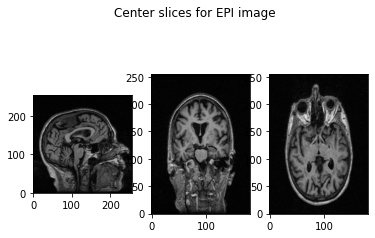

In [5]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
   plt.suptitle("Center slices for EPI image") 
# (53, 61, 33)
slice_0 = img_data[90, :, :, 0]
slice_1 = img_data[:, 127, :, 0]
slice_2 = img_data[:, :, 127, 0]
show_slices([slice_0, slice_1, slice_2])
# plt.suptitle("Center slices for EPI image")  

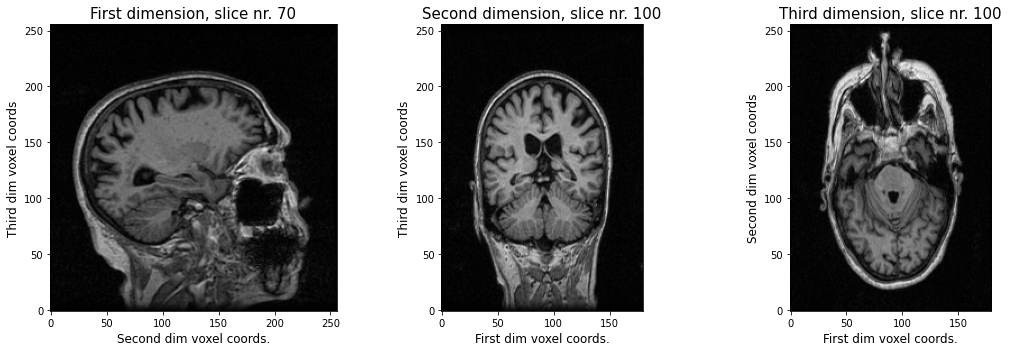

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :, 0].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_data[:, 99, :, 0].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_data[:, :, 99, 0].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

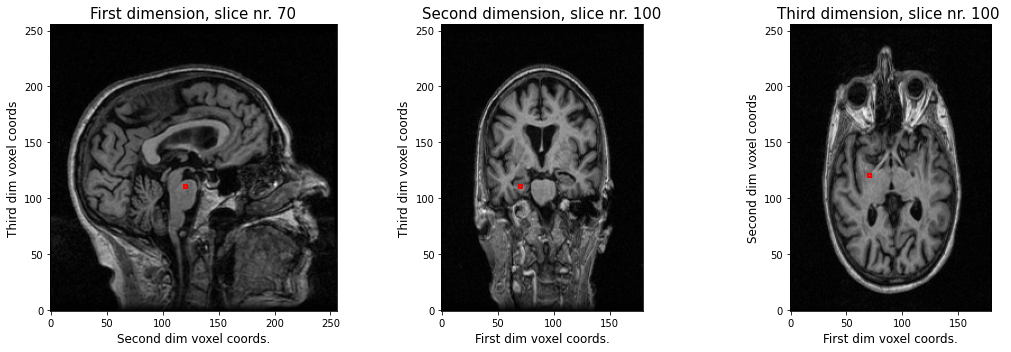

In [7]:
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[90, :, :, 0].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 127, :, 0].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 127, 0].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100 ', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

Data Scaling with NiBabel 

https://nipy.org/nibabel/nifti_images.html

Default scaling values are NaN

In [ ]:
head = img.header
head['scl_slope']
head['scl_inter']
head.get_slope_inter()

(None, None)

In [ ]:
head.set_slope_inter(2, 10)
head.get_slope_inter()

(2.0, 10.0)

The data won't change until we save and load the new image

In [ ]:
img.get_fdata()

Now we save the scaled image and load again

In [ ]:
nib.save(img, 'scaled_image.nii')
scaled_img = nib.load('scaled_image.nii')

In [ ]:
scaled_data = scaled_img.get_fdata()

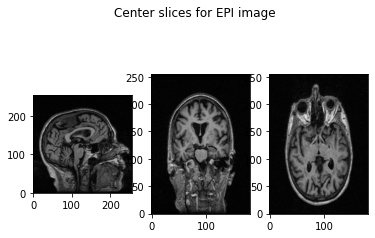

In [ ]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
   plt.suptitle("Center slices for EPI image") 
# (53, 61, 33)
slice_0 = scaled_data[90, :, :, 0]
slice_1 = scaled_data[:, 127, :, 0]
slice_2 = scaled_data[:, :, 127, 0]
show_slices([slice_0, slice_1, slice_2])
# plt.suptitle("Center slices for EPI image")  